# imports

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

writer = pd.ExcelWriter('./results/data_of_all.xlsx', engine='xlsxwriter')

# config

In [22]:
config_prefix = ['TI', 'TR', 'BR', 'BI']

config_datasheet = r'./results/preprocessed.xlsx'

# import df

In [23]:
df_raw = pd.read_excel(config_datasheet)
df_raw["answer"] = df_raw["answer"].astype(str)
df_raw

,case,factor,algorithm,answer,idk,time,correctness,Run Out Of Time,Outlier
0,198,TI,BinarySearch,Arooba,False,8,False,False,False
1,211,TI,BinarySearch,3,False,58,True,False,False
2,224,TI,BinarySearch,3,False,30,True,False,False
3,231,TI,BinarySearch,3,False,85,True,False,False
4,232,TI,BinarySearch,3,False,5,True,False,False
...,...,...,...,...,...,...,...,...,...
152,182,BI,ReverseString,Arooba,False,4,False,False,False
153,210,BI,ReverseString,gnikcarTeyE,False,72,True,False,False
154,212,BI,ReverseString,gnikcarTeyE,False,60,True,False,False
155,226,BI,ReverseString,"""gnikcarTeyE""",False,29,True,False,False


# Run Out Of Time

In [25]:
df_total = df_raw.copy()
df_total["algorithm"] = "Total"
df_sub = pd.concat([df_raw, df_total])

df_result = pd.DataFrame(columns=["Factor", "Algorithm", "NumberOfResponses", "NumberOfOutOfTime"])
for algorithm in df_sub["algorithm"].unique():
    for factor in df_sub["factor"].unique():
        df_current = df_sub[(df_sub["factor"] == factor) & (df_sub["algorithm"] == algorithm)]
        total = len(df_current)
        run_out_of_time = len(df_current[df_current["Run Out Of Time"] == True])
        df_result.loc[len(df_result)] = [factor, algorithm, total, run_out_of_time]
df_result["Ratio"] = df_result[["NumberOfOutOfTime", "NumberOfResponses"]].apply(lambda x: x["NumberOfOutOfTime"]/x["NumberOfResponses"] if x["NumberOfResponses"] != 0 else 0, axis=1)
df_result["Ratio"] = df_result["Ratio"].round(2)
df_result

,Factor,Algorithm,NumberOfResponses,NumberOfOutOfTime,Ratio
0,TI,BinarySearch,7,0,0.00
1,TR,BinarySearch,5,0,0.00
2,BR,BinarySearch,5,0,0.00
3,BI,BinarySearch,5,0,0.00
4,TI,BubbleSort,5,0,0.00
5,TR,BubbleSort,7,0,0.00
6,BR,BubbleSort,5,0,0.00
7,BI,BubbleSort,5,0,0.00
8,TI,Factorial,1,1,1.00
9,TR,Factorial,5,1,0.20


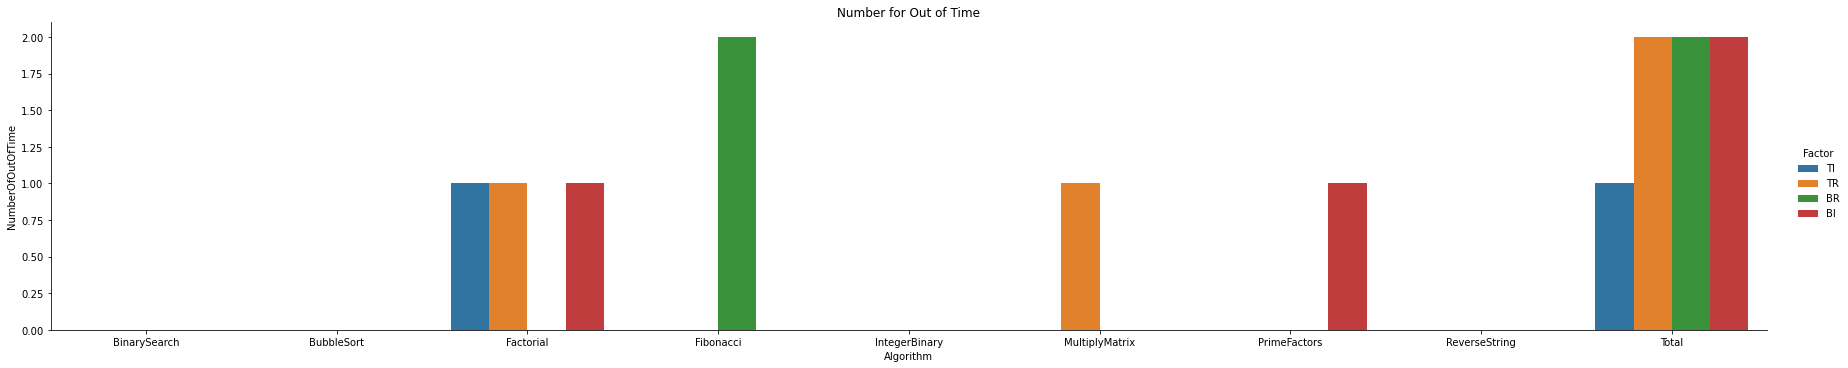

In [26]:
ax = sns.catplot(x="Algorithm", y="NumberOfOutOfTime", hue="Factor", data=df_result, kind="bar",
                 height=5, aspect=5)
ax.tight_layout()
plt.title("Number for Out of Time")
plt.show()
plt.close('all')

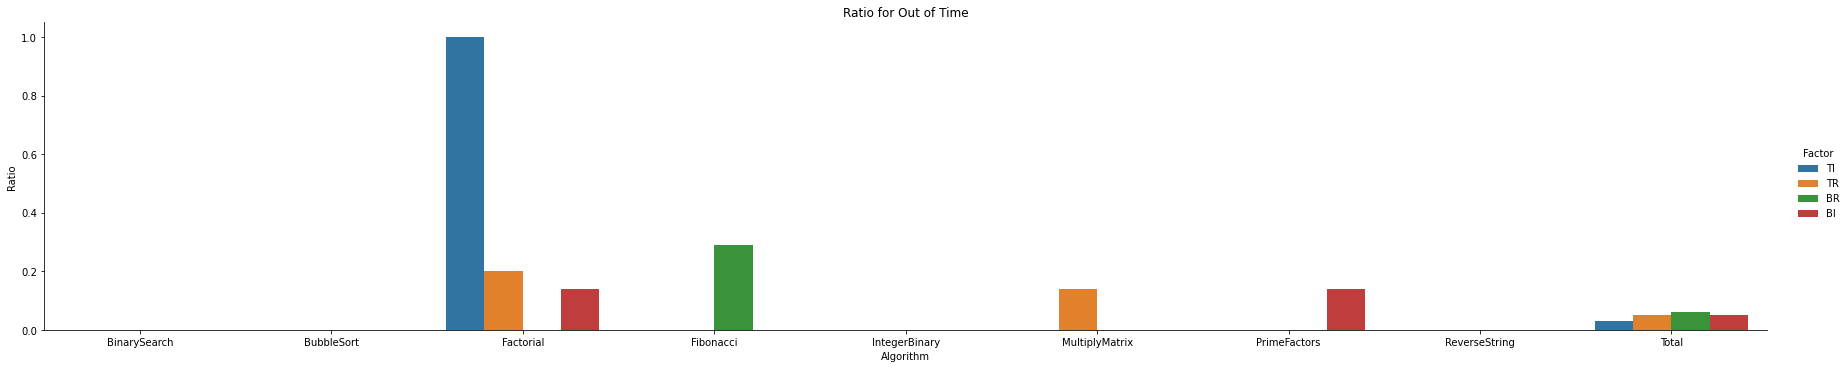

In [27]:
ax = sns.catplot(x="Algorithm", y="Ratio", hue="Factor", data=df_result, kind="bar",
                 height=5, aspect=5)
ax.tight_layout()
plt.title("Ratio for Out of Time")
plt.show()
plt.close('all')

In [35]:
df_result.groupby(["Algorithm", "Factor"])["Ratio"].describe()[["mean", "std"]]

mean  std
Algorithm      Factor           
BinarySearch   BI      0.00  NaN
               BR      0.00  NaN
               TI      0.00  NaN
               TR      0.00  NaN
BubbleSort     BI      0.00  NaN
               BR      0.00  NaN
               TI      0.00  NaN
               TR      0.00  NaN
Factorial      BI      0.14  NaN
               BR      0.00  NaN
               TI      1.00  NaN
               TR      0.20  NaN
Fibonacci      BI      0.00  NaN
               BR      0.29  NaN
               TI      0.00  NaN
               TR      0.00  NaN
IntegerBinary  BI      0.00  NaN
               BR      0.00  NaN
               TI      0.00  NaN
               TR      0.00  NaN
MultiplyMatrix BI      0.00  NaN
               BR      0.00  NaN
               TI      0.00  NaN
               TR      0.14  NaN
PrimeFactors   BI      0.14  NaN
               BR      0.00  NaN
               TI      0.00  NaN
               TR      0.00  NaN
ReverseString  BI      0.00  NaN
               BR      0.00  NaN
               TI      0.00  NaN
               TR      0.00  NaN
Total          BI      0.05  NaN
               BR      0.06  NaN
               TI      0.03  NaN
               TR      0.05  NaN